# Sentiment Analysis on COVID-19 Tweets 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
tweet_data = pd.read_csv("C:\\Users\\pujap\\OneDrive\\Desktop\\PROJECT\\tweet_data.csv")

In [3]:
tweet_data.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False
179107,TUKY II,"Aliwal North, South Africa",TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...,2018-04-14 17:30:07,97,1697,566,False,2020-08-29 19:44:08,I stop when I see a Stop\n\n@SABCNews\n@Izinda...,NaN,Twitter for Android,False


In [4]:
tweet_data.shape

(179108, 13)

In [5]:
tweet_data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [6]:
tweet_data.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [7]:
tweet_data['source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Buffer', 'TweetDeck', 'Twitter for iPad', 'Africa Newsroom',
       'Blood Donors India', 'TweetCaster for Android',
       'Alexander Higgins', 'IFTTT', 'Hootsuite Inc.', 'Sprout Social',
       'Sprinklr', 'assarofficial', 'IAMBLOG2TWITTER', 'CrowdControlHQ',
       'COVID19-Updates', 'EveryoneSocial', 'Dynamic Signal', 'Instagram',
       'TweetCaster for iOS', 'GlobalPandemic.NET', 'Venrap Radio',
       'HeyOrca', 'Twitter for Advertisers', 'Paper.li',
       'Twitter Media Studio', 'Twitter for Mac', 'dlvr.it',
       'Cheap Bots, Done Quick!', 'Prof. Shanku', 'LaterMedia',
       'SEMrush Social Media Tool', 'Twitterrific for iOS',
       "Sebastian's Twitter Bot", 'Threader_client', 'COVID19FactoidBot',
       'PwC UK SMART', 'tweet pro stiff', 'UK COVID-19 Alerts',
       'Resistbot Open Letters', 'preprint-alert', 'ContentStudio.io',
       'Peeping Moon', 'TweetAutomaticos', 'Orlo', 'AgoraPulse Ma

In [8]:
tweet_data['source'].value_counts()

Twitter Web App              56891
Twitter for Android          40179
Twitter for iPhone           35472
TweetDeck                     8543
Hootsuite Inc.                7321
                             ...  
DataBlogger                      1
Dear_Assistant                   1
OnlyPultCom                      1
Washington Square Parkerz        1
Radiology: AI app                1
Name: source, Length: 610, dtype: int64

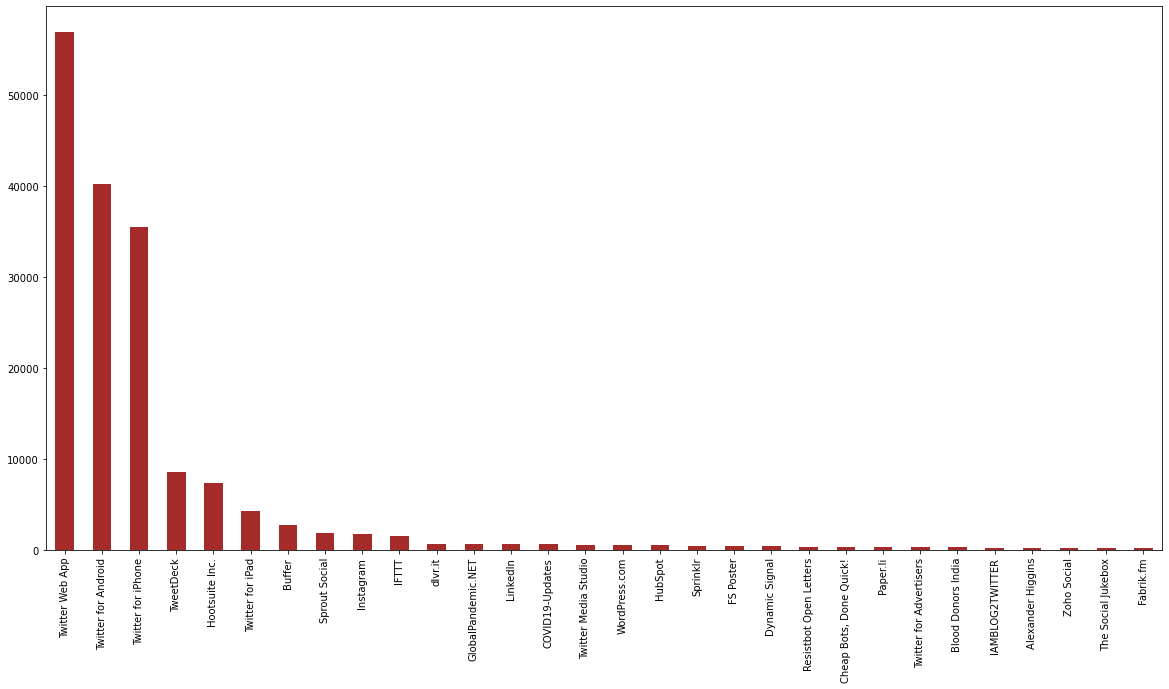

In [9]:
plt.figure(figsize=(20,10)) # (width, height)
tweet_data['source'].value_counts().nlargest(30).plot(kind = 'bar', color = 'brown')
plt.show()

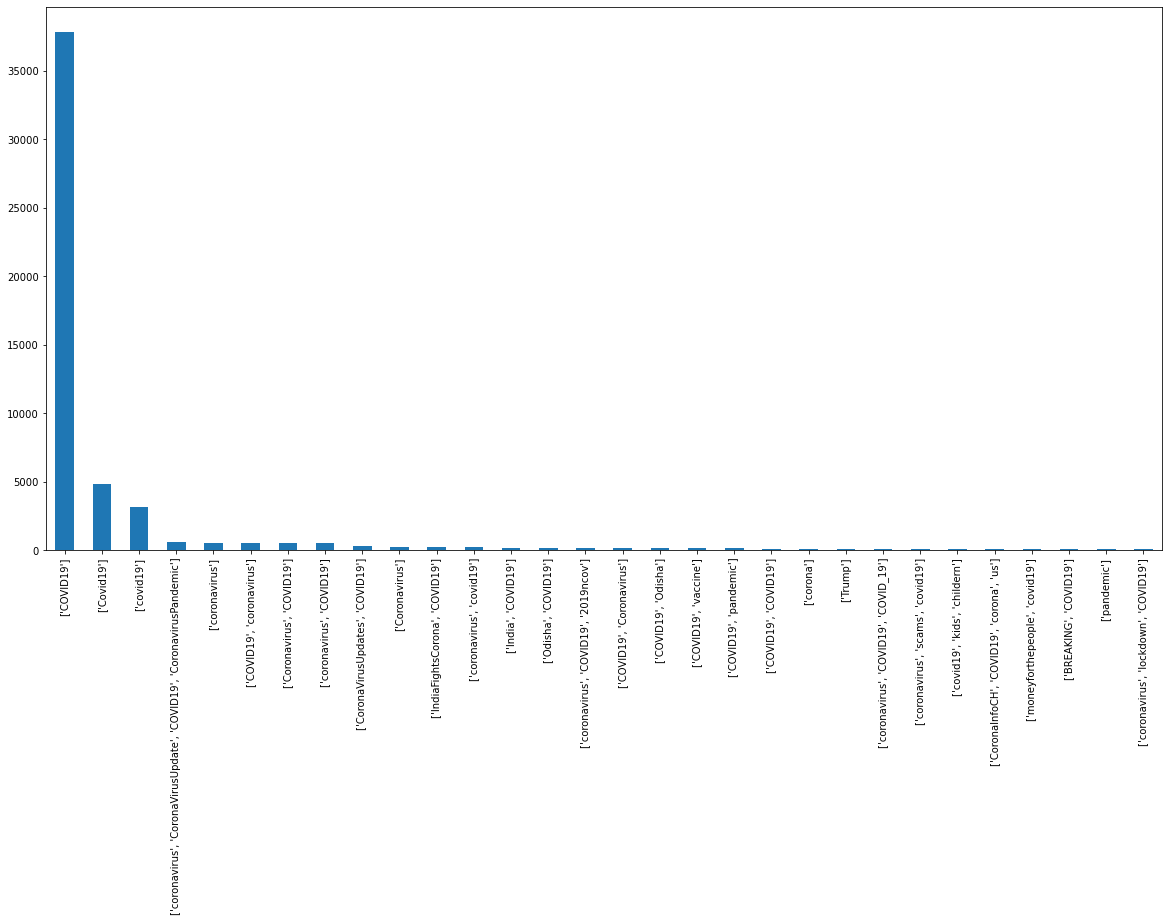

In [10]:
plt.figure(figsize=(20,10)) # (width, height)
tweet_data['hashtags'].value_counts().nlargest(30).plot(kind = 'bar')
plt.show()

# Preprocessing

# Data Cleaning

In [11]:
#preprocessing
import neattext.functions as nfx

In [12]:
tweet_data['text'].apply(nfx.extract_hashtags)

0                                      []
1                                      []
2                              [#COVID19]
3                              [#COVID19]
4         [#CoronaVirusUpdates, #COVID19]
                       ...               
179103                       [#WearAMask]
179104                         [#COVID19]
179105                                 []
179106                         [#COVID19]
179107                                 []
Name: text, Length: 179108, dtype: object

In [13]:
#removing hashtags
tweet_data['clean_tweet'] = tweet_data['text'].apply(nfx.remove_hashtags)

In [14]:
tweet_data[['text', 'clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...,@brookbanktv The one gift has give me is an ...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \n@kansa...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks @IamOhmai for nominating me for the @WH...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! The year of insanity! Lol! https://t.c...
179105,@CTVNews A powerful painting by Juan Lucena. I...,@CTVNews A powerful painting by Juan Lucena. I...
179106,"More than 1,200 students test positive for #CO...","More than 1,200 students test positive for a..."


In [15]:
tweet_data['text'].apply(nfx.extract_userhandles)

0                                                        []
1                              [@Yankees, @YankeesPR, @MLB]
2                  [@diane3443, @wdunlap, @realDonaldTrump]
3                                            [@brookbanktv]
4         [@kansalrohit69, @DrSyedSehrish, @airnewsalert...
                                ...                        
179103           [@IamOhmai, @WHO, @abdlbaasit_, @hvbxxb,…]
179104                                                   []
179105                                           [@CTVNews]
179106                                                   []
179107    [@SABCNews, @IzindabaNews24, @dailysunsa, @eNC...
Name: text, Length: 179108, dtype: object

In [16]:
#removing userhandles
tweet_data['clean_tweet'] = tweet_data['clean_tweet'].apply(nfx.remove_userhandles)

In [17]:
tweet_data[['text', 'clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and - wouldn't it have made more sen...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax. W...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciatio...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \n ...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks for nominating me for the challen...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! The year of insanity! Lol! https://t.c...
179105,@CTVNews A powerful painting by Juan Lucena. I...,A powerful painting by Juan Lucena. It's a t...
179106,"More than 1,200 students test positive for #CO...","More than 1,200 students test positive for a..."


In [18]:
#cleaning whitespaces
tweet_data['clean_tweet'] = tweet_data['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [19]:
tweet_data[['text', 'clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and - wouldn't it have made more sense to ...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax. We all c...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciation f...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel https://t.co...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks for nominating me for the challenge. I ...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! The year of insanity! Lol! https://t.co/...
179105,@CTVNews A powerful painting by Juan Lucena. I...,A powerful painting by Juan Lucena. It's a tr...
179106,"More than 1,200 students test positive for #CO...","More than 1,200 students test positive for at ..."


In [20]:
#removing urls
tweet_data['clean_tweet'] = tweet_data['clean_tweet'].apply(nfx.remove_urls)

In [21]:
tweet_data[['text', 'clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and - wouldn't it have made more sense to ...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax. We all c...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciation f...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks for nominating me for the challenge. I ...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! The year of insanity! Lol!
179105,@CTVNews A powerful painting by Juan Lucena. I...,A powerful painting by Juan Lucena. It's a tr...
179106,"More than 1,200 students test positive for #CO...","More than 1,200 students test positive for at ..."


In [22]:
#removing punctuations
tweet_data['clean_tweet'] = tweet_data['clean_tweet'].apply(nfx.remove_punctuations)

In [23]:
tweet_data[['text', 'clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and wouldnt it have made more sense to ha...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax We all cl...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciation f...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks for nominating me for the challenge I n...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020 The year of insanity Lol
179105,@CTVNews A powerful painting by Juan Lucena. I...,A powerful painting by Juan Lucena Its a trib...
179106,"More than 1,200 students test positive for #CO...",More than 1200 students test positive for at m...


# Tokenization

In [24]:
tokens = tweet_data['clean_tweet'].apply(lambda x: x.split())
tokens.head()

0    [If, I, smelled, the, scent, of, hand, sanitiz...
1    [Hey, and, wouldnt, it, have, made, more, sens...
2    [Trump, never, once, claimed, was, a, hoax, We...
3    [The, one, gift, has, give, me, is, an, apprec...
4            [25, July, :, Media, Bulletin, on, Novel]
Name: clean_tweet, dtype: object

# Stemming

In [25]:
#stemming
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
tokens=tokens.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

In [26]:
tokens.head()

0    [if, i, smell, the, scent, of, hand, sanit, to...
1    [hey, and, wouldnt, it, have, made, more, sens...
2    [trump, never, onc, claim, wa, a, hoax, we, al...
3    [the, one, gift, ha, give, me, is, an, appreci...
4            [25, juli, :, media, bulletin, on, novel]
Name: clean_tweet, dtype: object

In [27]:
for i in range(len(tokens)):
    tokens[i]=" ".join(tokens[i])

tweet_data['clean_tweet']=tokens
tweet_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_tweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,if i smell the scent of hand sanit today on so...
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,hey and wouldnt it have made more sens to have...
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,trump never onc claim wa a hoax we all claim t...
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,the one gift ha give me is an appreci for the ...
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,25 juli : media bulletin on novel


# Removing Stop words

In [28]:
tweet_data['clean_tweet'] = tweet_data['clean_tweet'].apply(nfx.remove_stopwords)

In [29]:
tweet_data[['text', 'clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,smell scent hand sanit today someon past think...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,hey wouldnt sens player pay respect a…
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,trump onc claim wa hoax claim thi effort to…
3,@brookbanktv The one gift #COVID19 has give me...,gift ha appreci simpl thing alway me…
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 juli : media bulletin novel
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,thank nomin challeng nomin
179104,2020! The year of insanity! Lol! #COVID19 http...,2020 year insan lol
179105,@CTVNews A powerful painting by Juan Lucena. I...,power paint juan lucena tribut grandpar die co...
179106,"More than 1,200 students test positive for #CO...",1200 student test posit major univers abc new


# Finding Polarity

In [30]:
#Sentiment analysis
from textblob import TextBlob

In [31]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 1
    elif sentiment_polarity < 0:
        sentiment_label = -1
    else:
        sentiment_label = 0
    result = {'polarity':sentiment_polarity,
          'subjectivity':sentiment_subjectivity,
          'sentiment':sentiment_label}
    return result

In [32]:
line2 = tweet_data['clean_tweet'].iloc[0]

In [33]:
get_sentiment(line2)

{'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': -1}

In [34]:
tweet_data['sentiment_results'] = tweet_data['clean_tweet'].apply(get_sentiment)

In [35]:
tweet_data['sentiment_results']

0         {'polarity': -0.25, 'subjectivity': 0.25, 'sen...
1         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                                ...                        
179103    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
179104    {'polarity': 0.8, 'subjectivity': 0.7, 'sentim...
179105    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
179106    {'polarity': 0.09943181818181818, 'subjectivit...
179107    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 179108, dtype: object

# Creating Labeled Dataset

In [36]:
tweet_data = tweet_data.join(pd.json_normalize(tweet_data['sentiment_results']))

In [37]:
tweet_data.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,smell scent hand sanit today someon past think...,"{'polarity': -0.25, 'subjectivity': 0.25, 'sen...",-0.25,0.250000,-1
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,hey wouldnt sens player pay respect a…,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,0
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,trump onc claim wa hoax claim thi effort to…,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,0
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,gift ha appreci simpl thing alway me…,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,0
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,25 juli : media bulletin novel,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,0
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False,death continu rise bad wa politician busi want…,"{'polarity': -0.6999999999999998, 'subjectivit...",-0.70,0.666667,-1
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False,chang work gener (and recruit specifically) via/,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,0
7,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,NaN,TweetDeck,False,wear face cover shop thi includ visit local co...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,0
8,Prathamesh Bendre,NaN,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29,18,False,2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...,"['covid19', 'covidPositive']",Twitter for Android,False,pray good health recoveri,"{'polarity': 0.7, 'subjectivity': 0.6000000000...",0.70,0.600000,1
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239,29802,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False,pope god prophet sadhu sundar selvaraj watch,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,0


In [38]:
tweet_data['sentiment'].value_counts()

 0    111110
 1     48904
-1     19094
Name: sentiment, dtype: int64

<AxesSubplot:>

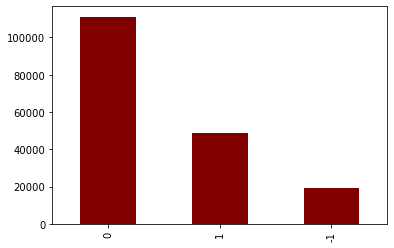

In [39]:
tweet_data['sentiment'].value_counts().plot(kind='bar', color ='maroon')

In [40]:
#keyword extraction
positive_tweet = tweet_data[tweet_data['sentiment'] == 1]['clean_tweet']
neutral_tweet = tweet_data[tweet_data['sentiment'] == 0]['clean_tweet']
negative_tweet = tweet_data[tweet_data['sentiment'] == -1]['clean_tweet']

In [41]:
positive_tweet

8                                 pray good health recoveri
12                    👋🏻 — safe everyon safe commit ensure…
13        let protect ourselv real number climb fast con...
20        good patriot volunt elect judg poll open without…
28        cross 2 lakh mark 150055 ppp ha recov far posi...
                                ...                        
179091    famili contribut alreadi 180000+ live lost amp...
179095    update: 23 new case today tricounti region new...
179097                                     live suffer kill
179104                                  2020 year insan lol
179106        1200 student test posit major univers abc new
Name: clean_tweet, Length: 48904, dtype: object

In [42]:
neutral_tweet

1                    hey wouldnt sens player pay respect a…
2              trump onc claim wa hoax claim thi effort to…
3                     gift ha appreci simpl thing alway me…
4                            25 juli : media bulletin novel
6          chang work gener (and recruit specifically) via/
                                ...                        
179101    wallkil school nurs add covid19 monitor daili ...
179102                        reach 25mil case worldwid oof
179103                           thank nomin challeng nomin
179105    power paint juan lucena tribut grandpar die co...
179107                                            stop stop
Name: clean_tweet, Length: 111110, dtype: object

In [43]:
negative_tweet

0         smell scent hand sanit today someon past think...
5           death continu rise bad wa politician busi want…
64        aka ill send 500 peopl like amp retweet thi $3...
72        thread (base intern research evidence) 1 updat...
80        time spike case isveri hard revers drastic loc...
                                ...                        
179067    60k + dead inact 20k + resid left die abandon ...
179080                            migrant worker hit hard :
179085    toilet paper avocado help explain groceri stor...
179086    widen small blood vessel lung appear link low ...
179094    symptom screen fail identifi case children rna...
Name: clean_tweet, Length: 19094, dtype: object

# Vectorization

In [44]:
#vectorization
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer=CountVectorizer(max_df=0.90,min_df=2)
vect=countvectorizer.fit_transform(tweet_data['clean_tweet'])

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(vect,tweet_data['sentiment'],random_state=2021,test_size=0.2)

In [45]:
vect

<179108x32253 sparse matrix of type '<class 'numpy.int64'>'
	with 1435803 stored elements in Compressed Sparse Row format>

Applying LogisticRegression

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from time import time
t0 = time()
model_logistic = LogisticRegression().fit(x_train,y_train)
print("training time:", round(time()-t0, 3), "s")
t1=time()
predicted_logistic = model_logistic.predict(x_test)
print("predict time:", round(time()-t1, 3), "s")

training time: 12.802 s
predict time: 0.008 s


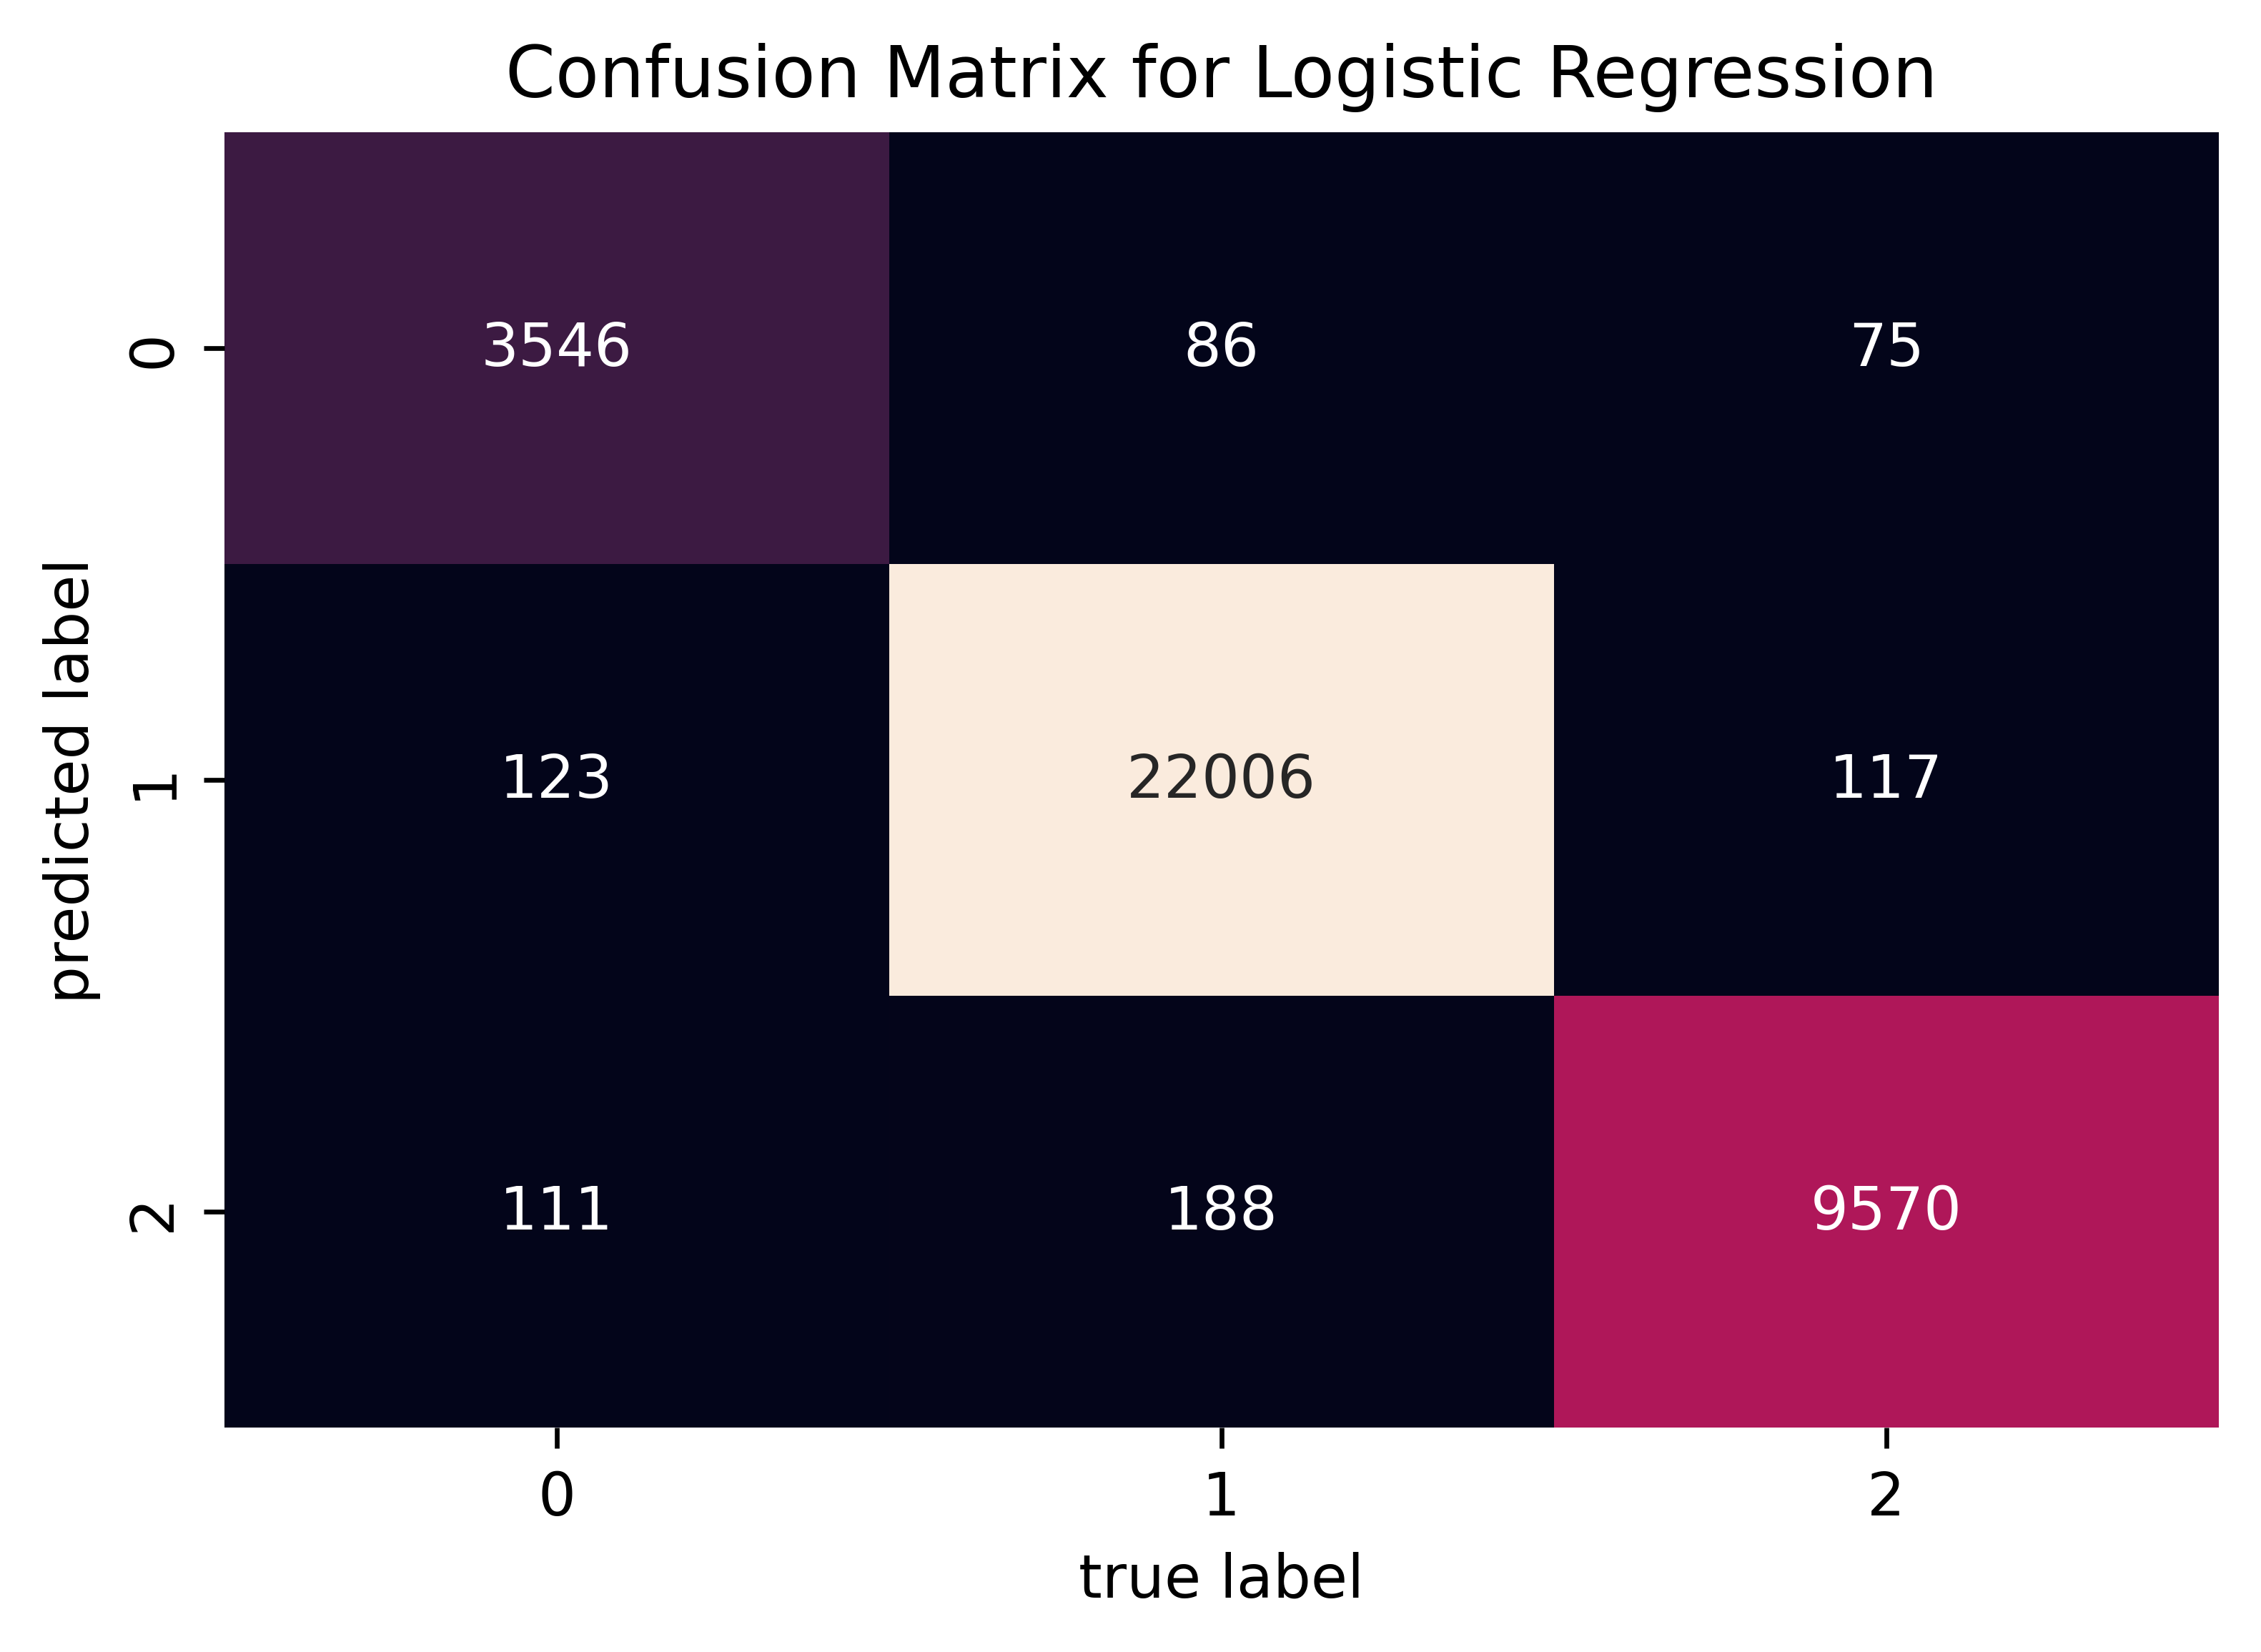

In [47]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_logistic)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [48]:
model_logistic.score(x_test,y_test)

0.980458935849478

In [49]:
# For prediction
# 1 means 'positive'
# -1 means 'negative'
# 0 means 'neutral'
#model_logistic.predict(x_test[3])[0]
model_logistic.predict(x_test)[0]

0

In [50]:
#y_test.head(6)

# Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
from time import time
t0 = time()
model_decision = DecisionTreeClassifier().fit(x_train,y_train)
print("training time:", round(time()-t0, 3), "s")
t1=time()
predicted_decision = model_decision.predict(x_test)
print("predict time:", round(time()-t1, 3), "s")

training time: 46.256 s
predict time: 0.06 s


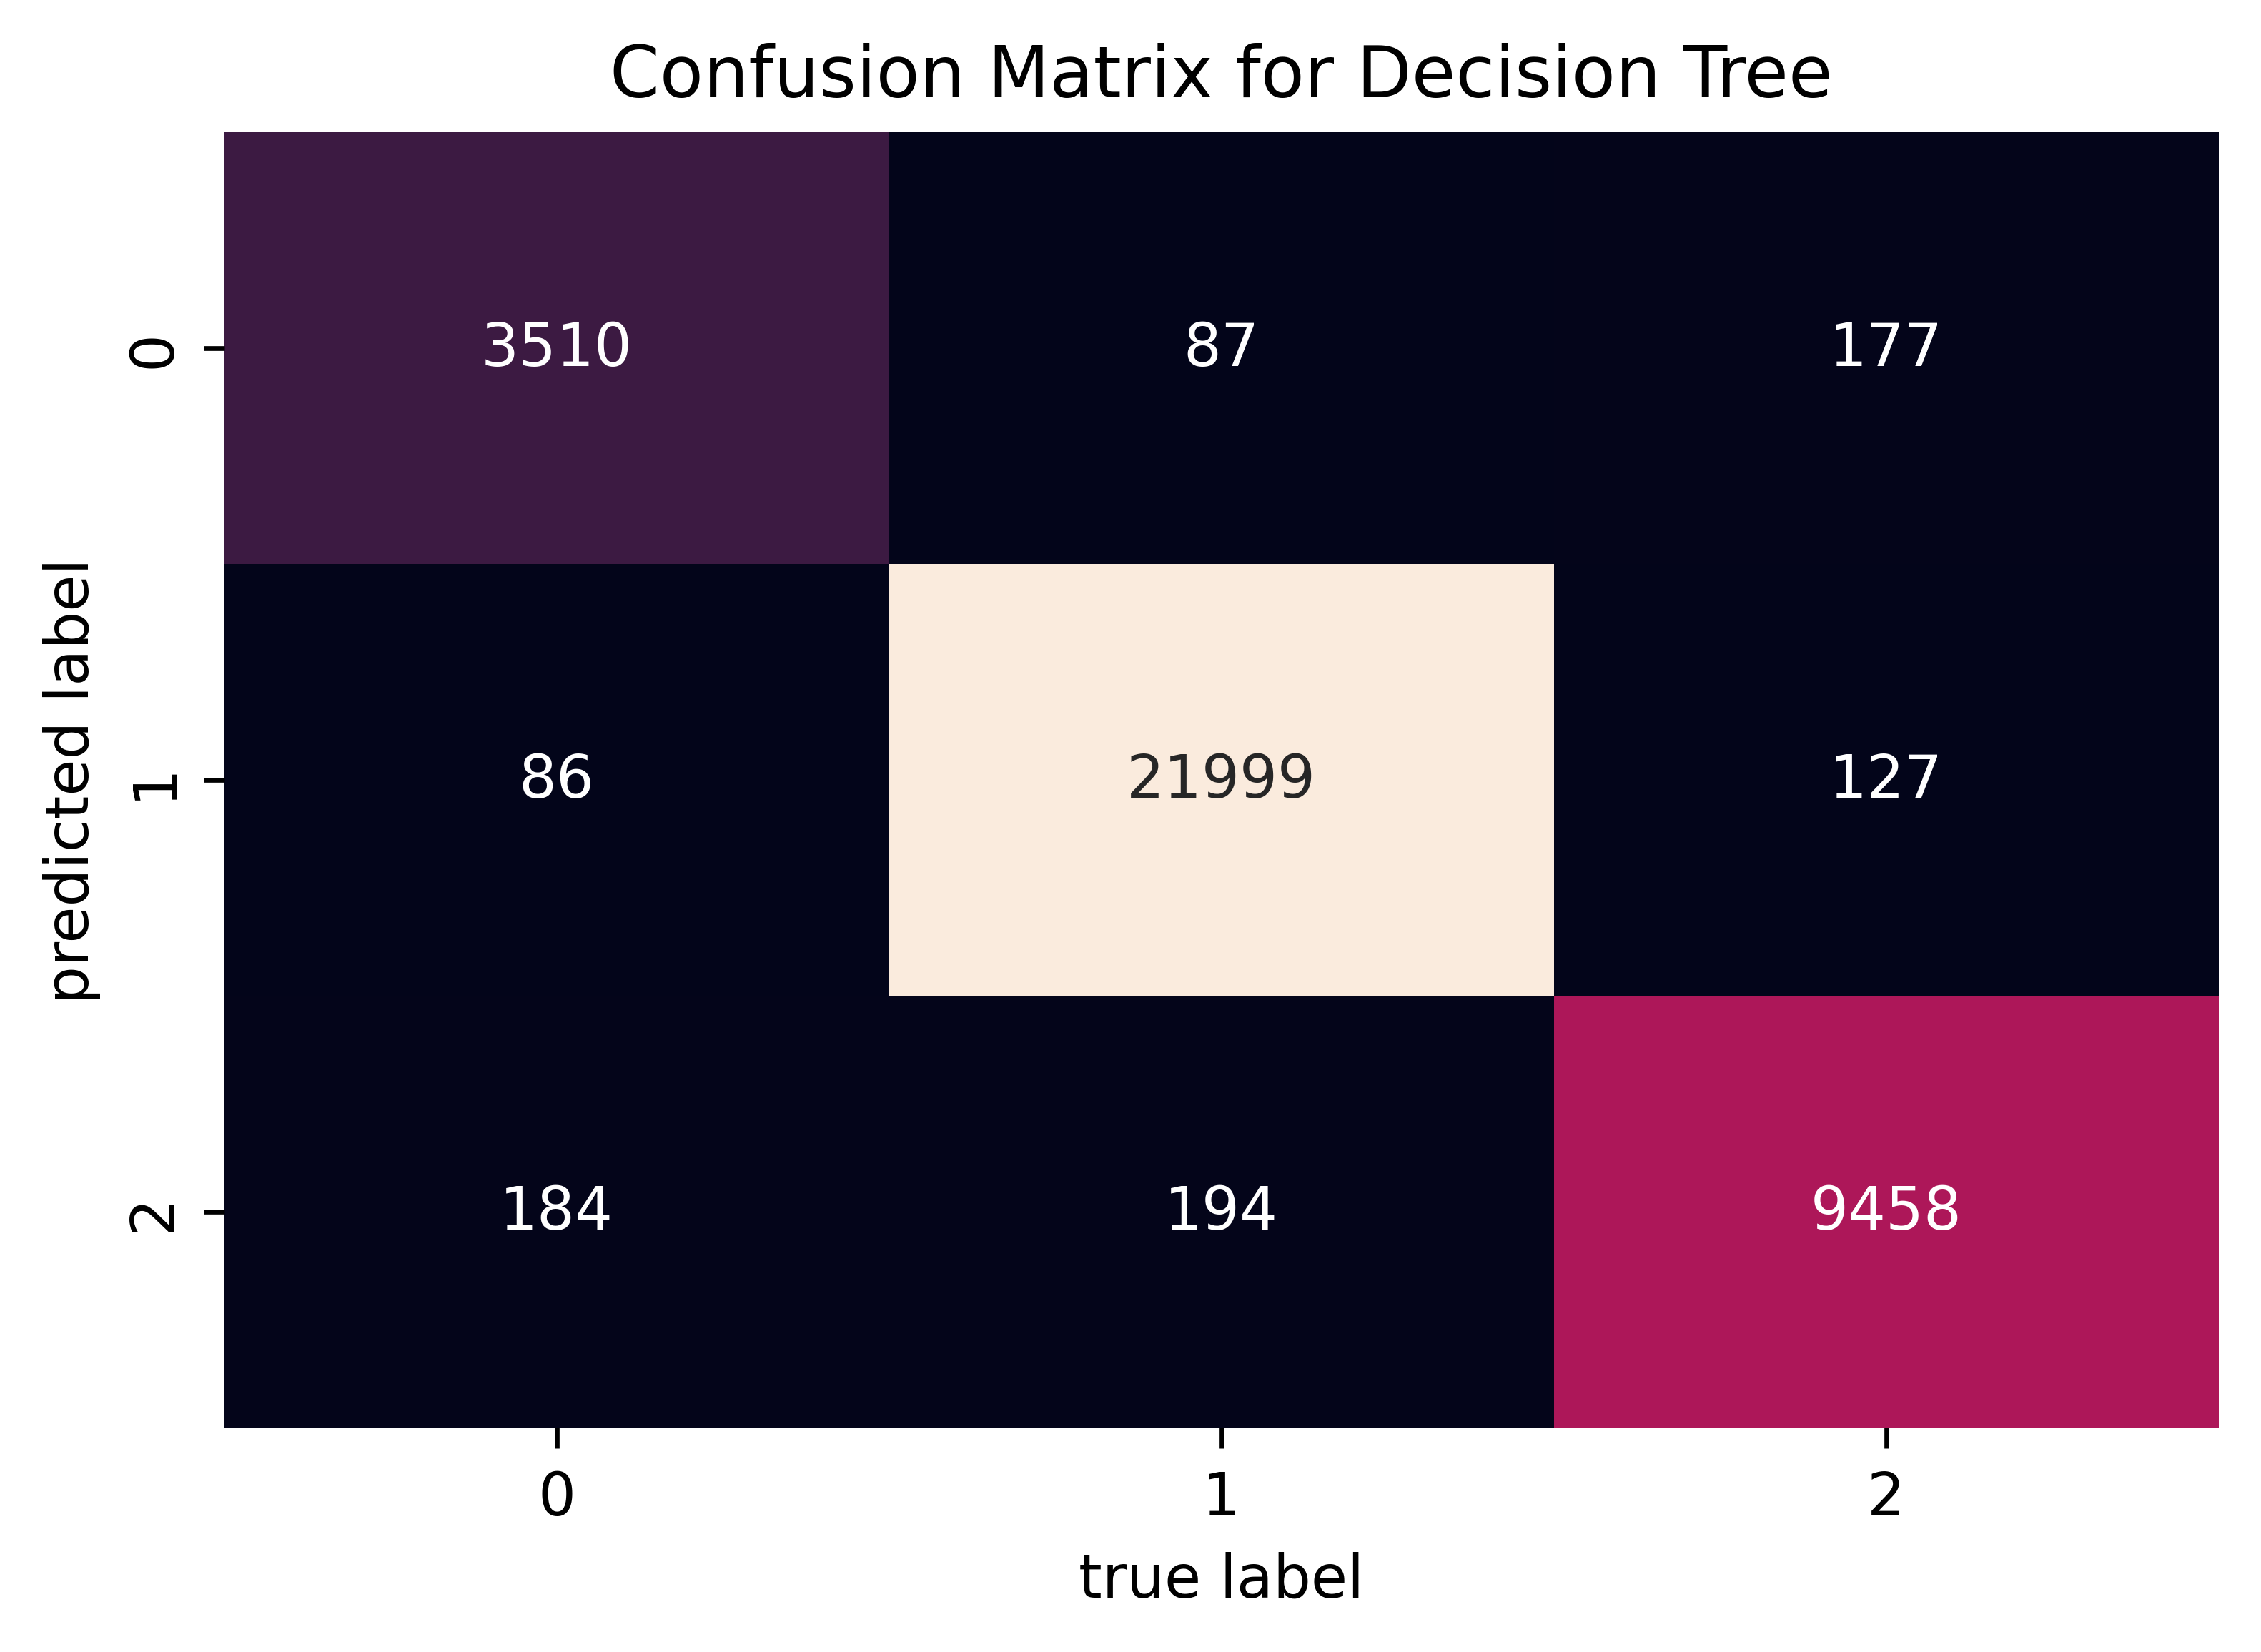

In [63]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_decision)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [53]:
model_decision.score(x_test, y_test)

0.9764390597956563

 # Naive Bayes

In [54]:
from sklearn.naive_bayes import MultinomialNB
t0 = time()
model_naive = MultinomialNB().fit(x_train, y_train)
print("training time:", round(time()-t0, 3), "s")
t1 = time()
predicted_naive = model_naive.predict(x_test)
print("predict time:", round(time()-t1, 3), "s")

training time: 0.062 s
predict time: 0.01 s


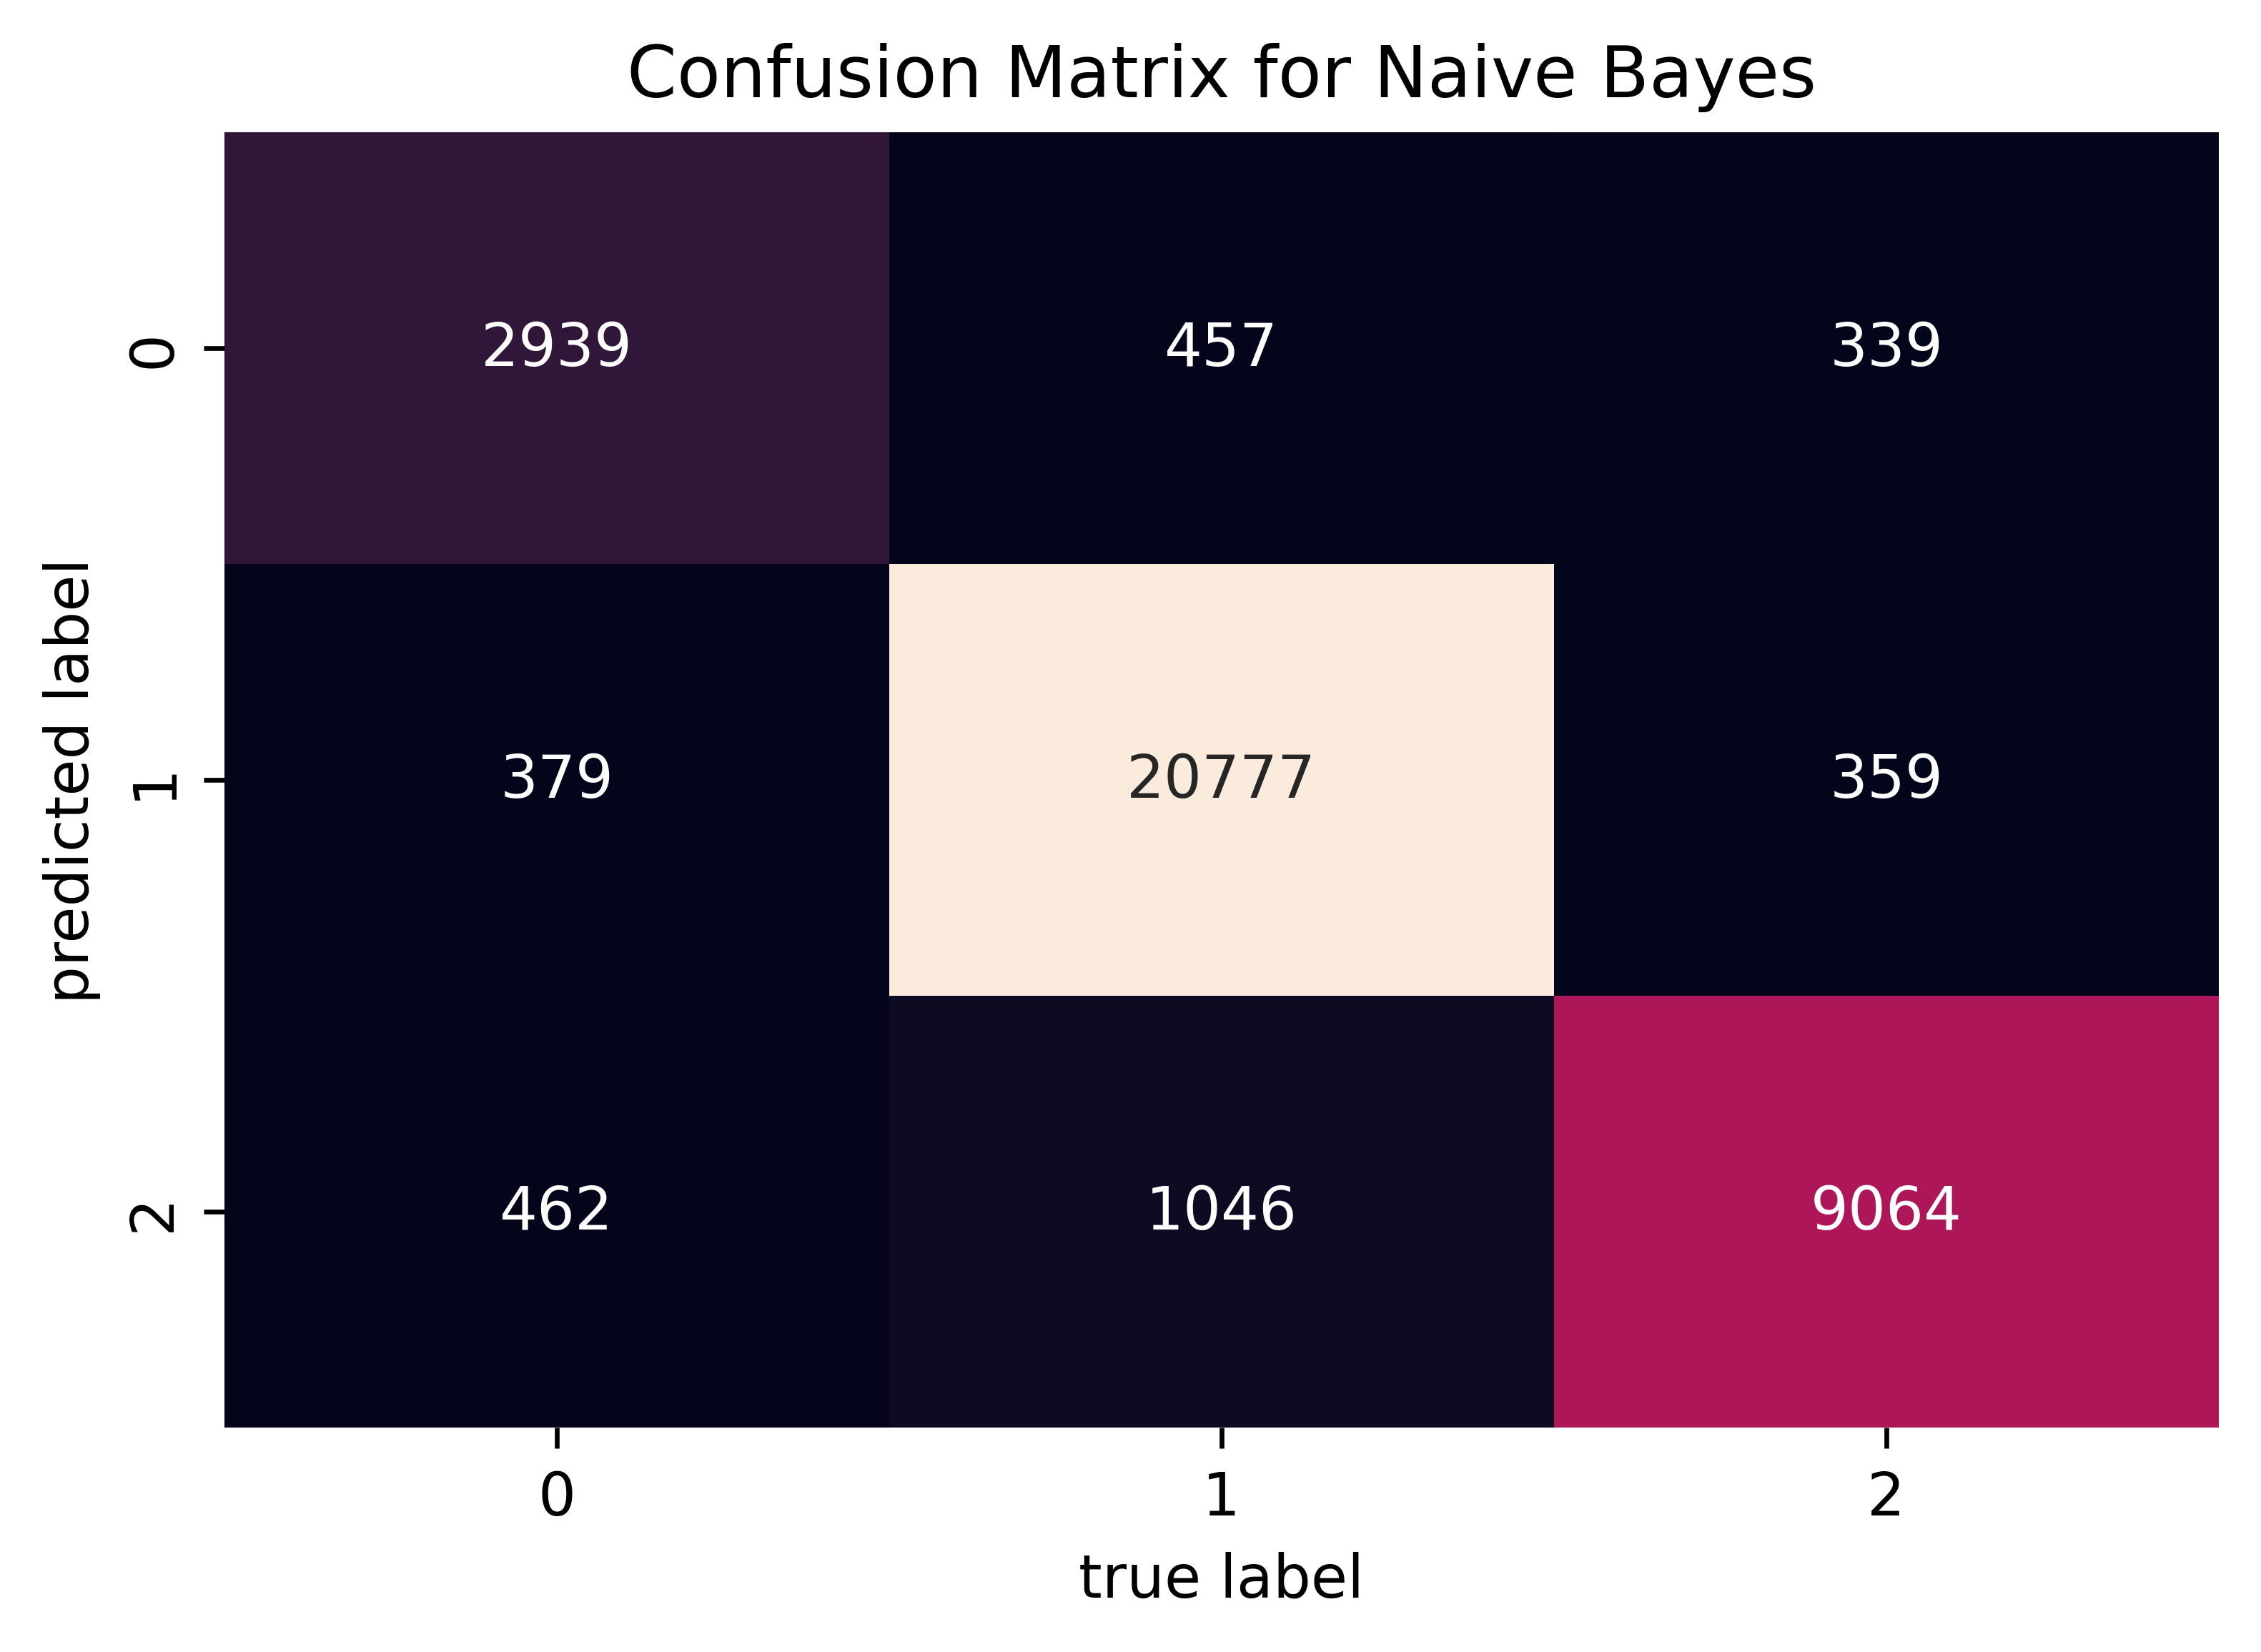

In [55]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [56]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.9150801183630172


 # Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
t0 = time()
model_LinearRegression = LinearRegression().fit(x_train,y_train)
print("training time:", round(time()-t0, 3), "s")
t1=time()
predicted_LinearRegression = model_LinearRegression.predict(x_test)
print("predict time:", round(time()-t1, 3), "s")

training time: 27.962 s
predict time: 0.008 s


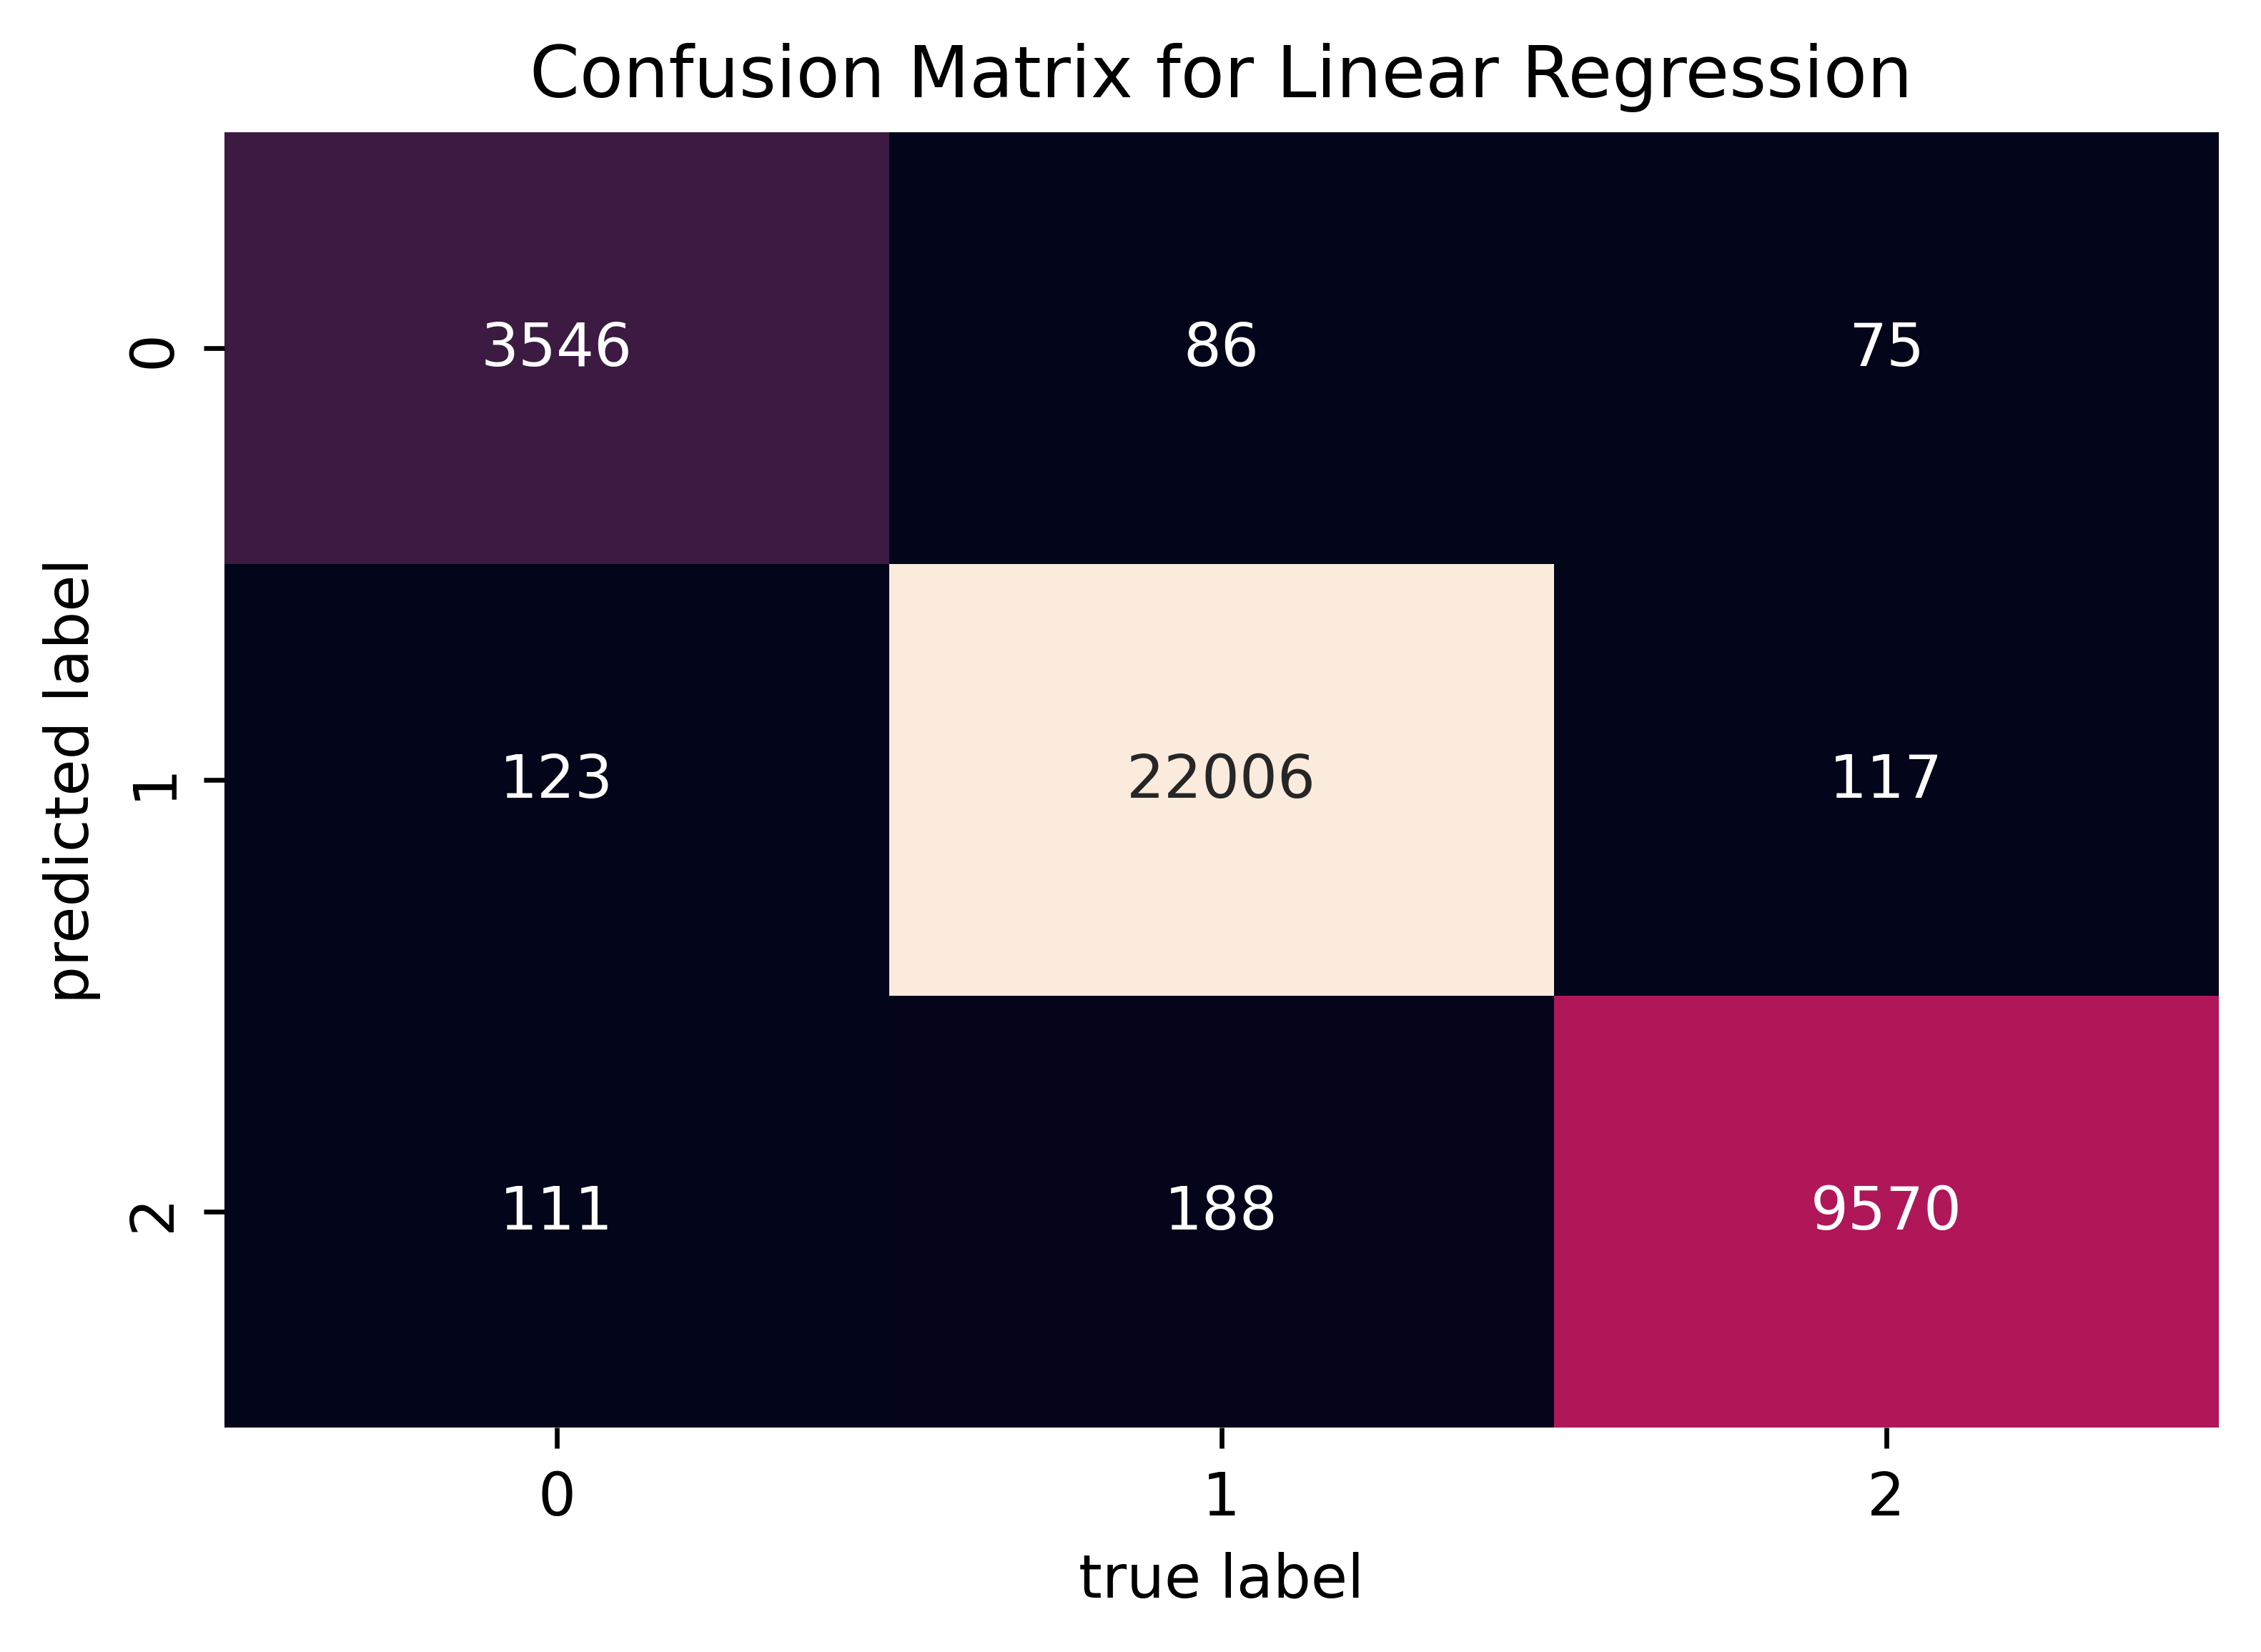

In [58]:
from sklearn.metrics import confusion_matrix
plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_logistic)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Linear Regression')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()






In [59]:
model_LinearRegression.score(x_test,y_test)

0.7158795467479525

# to check

In [60]:
#tweet_data.iloc[718:739, 9:18]

In [61]:
#tweet_data[['text', 'sentiment']].iloc[739:799]